In [2]:
import meva
from meva.lib.spin import get_pretrained_hmr
import mmcv 
import torch
from meva.utils import image_utils
from utils import imshownp
from skimage.transform import resize
import numpy as np
import data
from utils import makedirs_ifno
from tqdm.auto import tqdm, trange
import matplotlib.pyplot as plt

/home/tormod/Documents/APEC/meva/utils/transformations.py:1927: UserWarning: No module named 'meva.utils._transformations'
  warnings.warn(str(err))


In [3]:
from importlib import reload
reload(data)

<module 'data' from '/home/tormod/Documents/APEC/data.py'>

In [4]:
out_folder = '/home/tormod/ucph-erda-home/hmr_features'
c = data.ClimbingDataset('all', 
                         feat_folder=None, #out_folder,
                         seq_len=1)

In [10]:
d = c.get(0)

In [3]:
# hmr = get_pretrained_hmr()

====> Loading pre trained: data/meva_data/spin_model_checkpoint.pth.tar


In [4]:
# hmr.eval()
# imgs = d['norm_imgs']
# imgs = imgs[:1]
# imgs = imgs.float().to('cuda')
# feat, out = hmr(imgs, return_features=True)

In [ ]:
res = np.load(f'{out_folder}/{data.stripped_names[0]}.npy', allow_pickle=True)
out = res

In [15]:
out[0].keys()

dict_keys(['theta', 'verts', 'kp_2d', 'kp_3d', 'features'])

In [16]:
d.keys()

dict_keys(['raw_imgs', 'norm_imgs', 'features', 'raw_kp_2d', 'kp_2d', 'vid_idx', 'frames', 'bboxes', 'trans', 'inv_trans'])

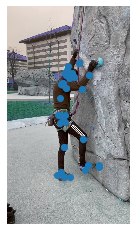

In [17]:
img = d['raw_imgs'][0]
norm_img = d['norm_imgs'][0]
imshownp(img)
kp_2d = out[0]['kp_2d'][0]
kp_2d = image_utils.normalize_2d_kp(kp_2d, inv=True)
#kp_3d = out[0]['kp_3d'].cpu().detach().numpy()[0]
kp_2d = image_utils.trans_points2d(kp_2d, d['inv_trans'])
plt.scatter(kp_2d[:,0], kp_2d[:,1])

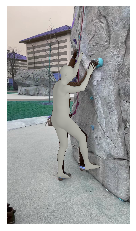

In [33]:
import mesh
reload(mesh)
verts = out[0]['verts'][0]
theta = out[0]['theta'][0]
bboxes = d['bboxes']
pred_cam = theta[:3]
pred_cam[0] *= 1.2
imshownp(mesh.render_pred_mesh(img, bboxes, verts, pred_cam))